In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

C:\Users\Taaniya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load dataset
input_training_df = pd.read_csv("./data/sales_data_training.csv",dtype=float)
input_test_df = pd.read_csv("./data/sales_data_test.csv",dtype=float)

print(input_training_df.columns)

# Extract features from training/test dataset
X_training = input_training_df.drop("total_earnings",axis=1).values
Y_training = input_training_df[['total_earnings']].values


Index(['critic_rating', 'is_action', 'is_exclusive_to_us', 'is_portable',
       'is_role_playing', 'is_sequel', 'is_sports', 'suitable_for_kids',
       'total_earnings', 'unit_price'],
      dtype='object')


In [4]:
input_training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
critic_rating         1000 non-null float64
is_action             1000 non-null float64
is_exclusive_to_us    1000 non-null float64
is_portable           1000 non-null float64
is_role_playing       1000 non-null float64
is_sequel             1000 non-null float64
is_sports             1000 non-null float64
suitable_for_kids     1000 non-null float64
total_earnings        1000 non-null float64
unit_price            1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
input_training_df.shape

(1000, 10)

In [6]:
input_test_df.shape

(400, 10)

In [7]:
# scale values of training dataset between 0 and 1
# create scaler instances for x and y separately

X_scaler_instance = MinMaxScaler(feature_range=(0,1))
Y_scaler_instance = MinMaxScaler(feature_range=(0,1))

# Create scalers from training data
X_training_scaled = X_scaler_instance.fit_transform(X_training)
Y_training_scaled = Y_scaler_instance.fit_transform(Y_training)

In [8]:
# Using the scalers fitted from training data on the test data so that the 
# test data is scaled by the same amount as the training data

X_test = input_test_df.drop('total_earnings',axis=1).values
Y_test = input_test_df[['total_earnings']].values

In [9]:
X_test_scaled = X_scaler_instance.transform(X_test)
Y_test_scaled = Y_scaler_instance.transform(Y_test)

In [10]:
RUN_NAME = "run_3 50 with histogram summary"

# Define the neural network structure

# training parameters
learning_rate = 0.001
training_epoch = 100
display_step = 5

# input/outputs
num_inputs = 9                             # no. of features/columns for each row in the dataset
num_outputs = 1


# define layer sizes i.e no. of nodes in each layer.
layer_1_nodes = 50
layer_2_nodes = 100
layer_3_nodes = 50

# save path for exported model
model_export_path = "exported_model"


In [11]:
# define all the layers of the neural network
# input layer
# input layer will have as many nodes as the number of features of each data row 


with tf.variable_scope("input"):
    # None tells tensorflow that our neural network can accept batches of input of any size,
    # num_inputs will tell that there will be 9 values for each record in the batch
    X = tf.placeholder(dtype=tf.float32,shape=(None,num_inputs))
    
# initialize biases with 0. Since biases is a variable, we use tf.get_variable and pass in the name.
# 1 weight for each node's connection to each node in the layer.
# layer 1
with tf.variable_scope("layer_1"):
    weights = tf.get_variable(name='weights_1',shape=[num_inputs,layer_1_nodes],
                                              initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name='biases_1',shape=[layer_1_nodes],initializer=tf.zeros_initializer())
    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)
    
# layer 2
with tf.variable_scope("layer_2"):
    weights = tf.get_variable(name='weights_2',shape=[layer_1_nodes,layer_2_nodes],
                                              initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name='biases_2',shape=[layer_2_nodes],initializer=tf.zeros_initializer())
    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output,weights) + biases)
    
# layer 3
with tf.variable_scope("layer_3"):
    weights = tf.get_variable(name='weights_3',shape=[layer_2_nodes,layer_3_nodes],
                                              initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name='biases_3',shape=[layer_3_nodes],initializer=tf.zeros_initializer())
    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output,weights) + biases)
    
    
# output layer    
with tf.variable_scope("output"):
    weights = tf.get_variable(name='weights_4',shape=[layer_3_nodes,num_outputs],
                                              initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name='biases_4',shape=[num_outputs],initializer=tf.zeros_initializer())
    #prediction = tf.nn.relu(tf.matmul(layer_3_output,weights) + biases)
    prediction = tf.matmul(layer_3_output,weights) + biases
    

# define the cost function
with tf.variable_scope("cost"):
    # target value Y
    Y = tf.placeholder(dtype=tf.float32,shape=(None,1))
    cost = tf.reduce_mean(tf.squared_difference(prediction,Y))
    
    
# define optimizer for training
with tf.variable_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# creating a summary operation to log progress of the network. 
# This will be a separate node in our tensorflow's computational graph
with tf.variable_scope("logging"):
    tf.summary.scalar("current cost",cost)               # pass in the name and reference to the scalar valued metric
                                                         # we wish to monitor by logging
    tf.summary.histogram("predicted_value",prediction)
    # adding a new node which will run all the summary nodes before this.
    summary = tf.summary.merge_all()
    
    ## tf.summary.scalar object represents the value we are logging
    


INFO:tensorflow:Summary name current cost is illegal; using current_cost instead.


In [11]:
# creating tf.train.saver object. Placing this code after the graph definition and befor the training loop starts    
# saver = tf.train.Saver(keep_checkpoint_every_n_hours=1)

In [12]:
type(X)

tensorflow.python.framework.ops.Tensor

In [13]:
type(weights)

tensorflow.python.ops.variables.RefVariable

In [14]:
type(biases)

tensorflow.python.ops.variables.RefVariable

In [15]:
type(layer_3_output)

tensorflow.python.framework.ops.Tensor

In [16]:
type(Y)

tensorflow.python.framework.ops.Tensor

In [17]:
type(cost)

tensorflow.python.framework.ops.Tensor

In [18]:
type(optimizer)

tensorflow.python.framework.ops.Operation

In [36]:
# Setting up training loop

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess=sess,save_path="./logs/trained_model.ckpt")
    
    ### create summary filewriter operation. Unlike tf.summary which create summary in protobuf format understandable by 
    ### tensorflow, this filewriter will actually write those to disk
    ## Filewriter write summary protocol buffers to event files
    training_logs_writer = tf.summary.FileWriter(logdir="./logs/{}/train".format(RUN_NAME),graph=sess.graph)
    testing_logs_writer = tf.summary.FileWriter(logdir="./logs/{}/test".format(RUN_NAME),graph=sess.graph)
    
    # Running the optimizer in loop for training
    # perform training for epochs
    # 1 epoch is one full run through the dataset

        
    for epoch in range(training_epoch):    
        sess.run(optimizer,feed_dict={X:X_training_scaled, Y:Y_training_scaled})
    
        if epoch % 5 == 0:
            training_cost,training_summary = sess.run([cost,summary],\
                                                              feed_dict={X:X_training_scaled,Y:Y_training_scaled})
            testing_cost,testing_summary = sess.run([cost,summary],\
                                                              feed_dict={X:X_test_scaled,Y:Y_test_scaled})

            # in the steps above, we obtained the data stored in training and testing summary variables as bytes.
            #In the next step, these summaries will be written down into log files.
            
            training_logs_writer.add_summary(training_summary, epoch)   # epoch values become our x-axis
            testing_logs_writer.add_summary(testing_summary, epoch)
            
            print(epoch,training_cost,testing_cost)
        
    final_training_cost = sess.run(cost,feed_dict={X:X_training_scaled,Y:Y_training_scaled})
    final_testing_cost = sess.run(cost,feed_dict={X:X_test_scaled,Y:Y_test_scaled})
        
    print("final training cost:{}".format(final_training_cost))
    print("final testing cost:{}".format(final_testing_cost))
    print("training is complete.")
        
    predicted_earnings_scaled = sess.run(prediction, feed_dict={X:X_test_scaled,Y:Y_test_scaled})    
    predicted_earnings = Y_scaler_instance.inverse_transform(predicted_earnings_scaled)
    print("predicted earning:{}".format(predicted_earnings[0]))    
        
    actual_earnings = Y_test[0]
    
    print("actual earning:{}".format(actual_earnings))
    # will return the path prefix of the checkpoint files
    # saved_path = saver.save(sess=sess,save_path="./logs/trained_model.ckpt")    
    
    # Exporting the model for deployment to cloud
    model_builder = tf.saved_model.builder.SavedModelBuilder(model_export_path)   # this will create a new directory for the model
    
    # define inputs/outputs of model that we want Google to use when it runs our model on cloud
    # Create the TensorInfo protobuf objects that encapsulates the input/output tensors
    # We use a dictionary with our input/output nodes as keys and their TensorInfo protobuf objects as values
    
    inputs = {
        'input': tf.saved_model.utils.build_tensor_info(X)
        }
    
    outputs = {
        'output': tf.saved_model.utils.build_tensor_info(prediction)
        }
    
    
    # define signatures
    # For prediction signature simply pass tensors that are input to the model and which are given as output from the model.
    
    # tf.saved_model.signature_constants.PREDICT_METHOD_NAME
    # A pre-defined function name. that's what Google will always look for to execute out model. 
    
    prediction_signature_def = tf.saved_model.signature_def_utils.build_signature_def(
    inputs=inputs,
    outputs=outputs,
    method_name=tf.saved_model.signature_constants.PREDICT_METHOD_NAME
    )
    
    # Next, we configure the model builder to tell it exactly how we want this model exported. 
    # metagraph - structure of our computational graph
    # variables - values we set our each node in the graph
    # signature def map will list all the signature defs that this model supports
    model_builder.add_meta_graph_and_variables(
                            sess,
                            tags=[tf.saved_model.tag_constants.SERVING],
                            signature_def_map={ 
                                tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY : prediction_signature_def
                            }
                                        )
    
    
    # export the model
    saved_path = model_builder.save(as_text=False)  # False - to be saved in serialised format otherwise in text.
            

0 0.04712542 0.05172021
5 0.027329646 0.029486189
10 0.011682668 0.0129472185
15 0.009341526 0.010056276
20 0.0047228313 0.0050391443
25 0.0028504734 0.0028570083
30 0.0024528657 0.002458
35 0.0019011691 0.0017832841
40 0.0013952854 0.0014404672
45 0.0009969122 0.00092308107
50 0.00077021396 0.00079991005
55 0.00062029524 0.0005768508
60 0.0005132792 0.0005116372
65 0.00042761097 0.00041750947
70 0.00035584054 0.00038056195
75 0.00029898834 0.00031730084
80 0.00025317495 0.0002856708
85 0.00021740625 0.00024522026
90 0.000189262 0.0002221201
95 0.00016669351 0.00020165999
final training cost:0.00015156179142650217
final testing cost:0.000188474528840743
training is complete.
predicted earning:[253982.5]
actual earning:[247537]
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: exported_model\saved_model.pb


In [29]:
type(training_cost)

numpy.float32

In [28]:
type(training_summary)

bytes

(array([ 21.,  73., 103.,  74.,  62.,  21.,  19.,  16.,   7.,   4.]),
 array([-0.00170284,  0.08821211,  0.17812705,  0.268042  ,  0.35795695,
         0.4478719 ,  0.53778684,  0.62770179,  0.71761674,  0.80753168,
         0.89744663]),
 <a list of 10 Patch objects>)

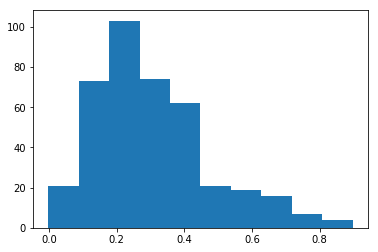

In [26]:
plt.hist(predicted_earnings_scaled)

(array([ 32.,  83., 102.,  63.,  61.,  16.,  16.,  10.,  13.,   4.]),
 array([0.01795161, 0.10520804, 0.19246446, 0.27972089, 0.36697732,
        0.45423375, 0.54149018, 0.6287466 , 0.71600303, 0.80325946,
        0.89051589]),
 <a list of 10 Patch objects>)

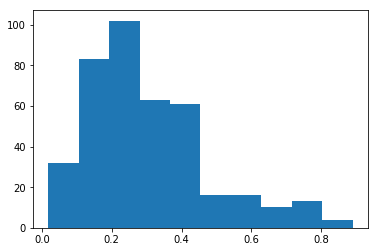

In [27]:
plt.hist(Y_test_scaled)

In [1]:
# why xavier weight initialization
# https://adventuresinmachinelearning.com/weight-initialization-tutorial-tensorflow/